In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG, BasicOpticalGatingPlotter as BOGP, Logger
from classes.drawer import Drawer

In [2]:
import copy
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data
# Generate

In [3]:
v = Drawer(10, 39.1, (196, 196))
v.generate_reference_sequence()
v.generate_sequence()

import tifffile as tf
tf.imwrite("test.tif", v.sequence)

In [4]:
sog = BOG()
sog.logger.set_quiet()
sog.set_reference_period(v.reference_period)
sog.set_reference_sequence(v.reference_sequence)
sog.set_sequence(v.sequence)
sog.set_reference_framerates(v.reference_phases)
sog.run(bias_correct = False, drift_correct = False)

sog_bc = BOG()
sog_bc.logger.set_quiet()
sog_bc.set_reference_period(v.reference_period)
sog_bc.set_reference_sequence(v.reference_sequence)
sog_bc.set_sequence(v.sequence)
sog_bc.set_reference_framerates(v.reference_phases)
sog_bc.run(bias_correct = True, drift_correct = False)

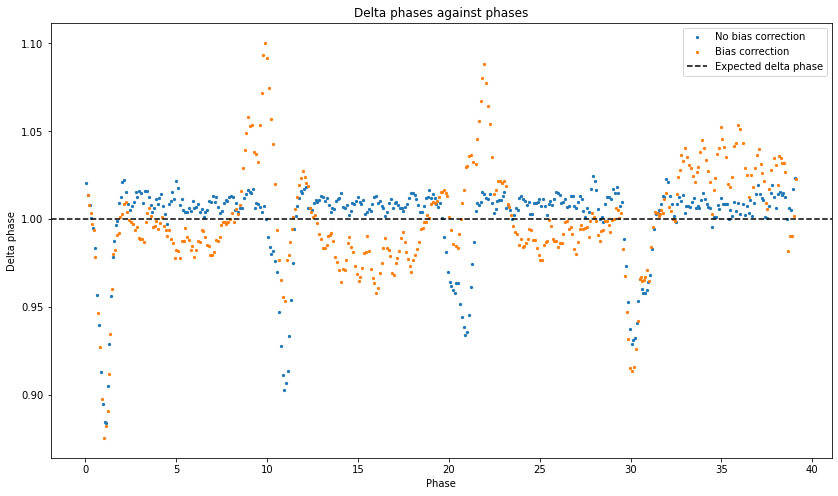

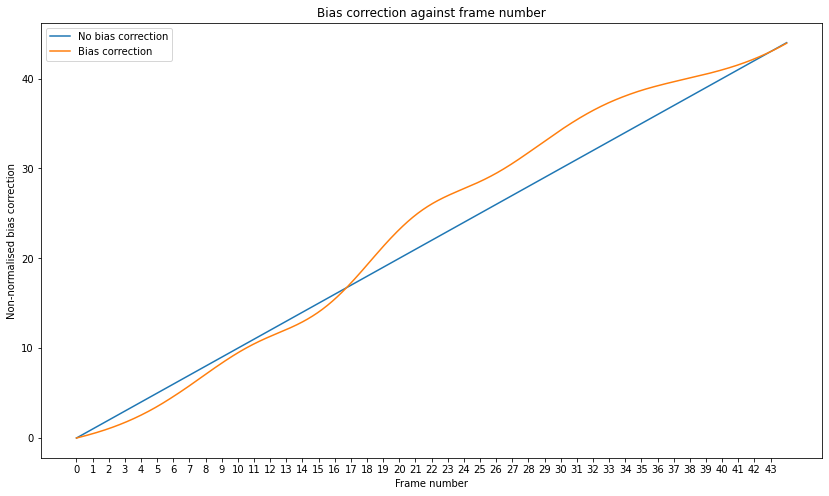

In [5]:
sogp = BOGP([sog, sog_bc], ["No bias correction", "Bias correction"])
sogp.plot_delta_phases_phases()
sogp.plot_bias_correction()